### Data Wrangling Project by Ahmed Sayed

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import re
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Gather Data
- Open 'twitter-archive-enhanced.csv' and store it in a dataframe

In [2]:
# Store archive csv file in a dataframe
archive = pd.read_csv('twitter-archive-enhanced.csv')

- Download image-predictions tsv file from the provided url and store in a dataframe

In [3]:
# Download image-predictions tsv file
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name=url.split('/')[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name,'wb') as f:
        f.write(response.content)

In [4]:
# Store image-predictions tsv file in a dataframe
image_prediction=pd.read_csv('image-predictions.tsv',sep='\t')

In [26]:
# Twitter API data
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

- Convert tweet_json.txt file to a datarame that contains (tweet_id, retweet_count, favorite_count) columns

In [5]:
df_list=list()
with open('tweet_json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        retweet_count=tweet['retweet_count']
        favorite_count=tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
        
api_df=pd.DataFrame(df_list)
api_df.head(5)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


### Assess Data
- First Visual Assessment


In [6]:
archive.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,12,10,Major,None,None,None,None
317,834786237630337024,NaN,NaN,2017-02-23 15:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tobi. She is properly fetching her sho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834786237...,13,10,Tobi,None,None,None,None
1749,679047485189439488,NaN,NaN,2015-12-21 21:15:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog doesn't know how to stairs. Quite tra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679047485...,9,10,None,None,None,None,None
1328,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349...,12,10,Lucy,None,None,None,None


In [8]:
image_prediction.head(30)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [9]:
api_df.head(20)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


- Second Programmatic Assessment
- archive dataframe 

In [10]:
archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [11]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [15]:
archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [16]:
archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [17]:
archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Quality issues in archive 
- tweet_id data type must be object.
- timestamp data type must be datetime.
- not required data in 'retweeted_status_id','retweeted_status_user_id' and      'retweeted_status_timestamp' columns.
- not required data 'in_reply_to_status_id' ,'in_reply_to_user_id columns'.
- some wrong values at rating_numerator and rating_denominator
- missing values in expanded urls
-------------------------

- Image_prediction dataframe

In [18]:
image_prediction.shape

(2075, 12)

In [19]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality issues in image_prediction
- tweet_id data must be object
- titles of p1 ,p1_conf,p1_dog,p2 ,p2_conf,p2_dog, p3 ,p3_conf,p3_dog have no meaning.

### Tidiness issues in image_prediction
- there is more than one column that represents the prediction values


- api_df

In [20]:
api_df.shape

(2354, 3)

In [21]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Tidiness issues in api_df 
- this table must be merged with the archive dataframe and then merge the two data frames with archive data frame to make the master dataframe

## Data Cleaning
### archive dataframe quality issues


In [22]:
### Before cleaning any data take a copy from the original dataframes
archive_clean=archive.copy()
imprediction_clean=image_prediction.copy()
api_new=api_df.copy()

### Define
- change data type of tweet_id to object using astype
- change data type of timestamp to datetime


### Code

In [23]:

archive_clean['tweet_id']=archive_clean['tweet_id'].astype(object)
archive_clean['timestamp']=pd.to_datetime(archive_clean['timestamp'])

### Test

In [24]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Define
- Drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

### Code

In [25]:
archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [26]:
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

### Test

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


### Define
- change all the values of archive_new['rating_denominator'] to 10
- change the worng values of archive_new['rating_numerator'] to more reasonable numbers

### Code

In [28]:
archive_clean['rating_denominator']=10

In [29]:
archive_clean.rating_numerator.replace(9,10,inplace=True)
archive_clean.rating_numerator.replace(8,18,inplace=True)
archive_clean.rating_numerator.replace(7,17,inplace=True)
archive_clean.rating_numerator.replace(6,16,inplace=True)
archive_clean.rating_numerator.replace(5,15,inplace=True)
archive_clean.rating_numerator.replace(4,14,inplace=True)
archive_clean.rating_numerator.replace(3,13,inplace=True)
archive_clean.rating_numerator.replace(1,10,inplace=True)
archive_clean.rating_numerator.replace(2,12,inplace=True)
archive_clean.rating_numerator.replace(420,12,inplace=True)
archive_clean.rating_numerator.replace(0,10,inplace=True)
archive_clean.rating_numerator.replace(75,17,inplace=True)
archive_clean.rating_numerator.replace(80,18,inplace=True)
archive_clean.rating_numerator.replace(20,19,inplace=True)
archive_clean.rating_numerator.replace(24,19,inplace=True)
archive_clean.rating_numerator.replace(26,19,inplace=True)
archive_clean.rating_numerator.replace(44,19,inplace=True)
archive_clean.rating_numerator.replace(50,19,inplace=True)
archive_clean.rating_numerator.replace(60,16,inplace=True)
archive_clean.rating_numerator.replace(165,16,inplace=True)
archive_clean.rating_numerator.replace(84,18,inplace=True)
archive_clean.rating_numerator.replace(88,18,inplace=True)
archive_clean.rating_numerator.replace(143,14,inplace=True)
archive_clean.rating_numerator.replace(182,18,inplace=True)
archive_clean.rating_numerator.replace(204,19,inplace=True)
archive_clean.rating_numerator.replace(666,16,inplace=True)
archive_clean.rating_numerator.replace(960,19,inplace=True)
archive_clean.rating_numerator.replace(1776,17,inplace=True)
archive_clean.rating_numerator.replace(27,17,inplace=True)
archive_clean.rating_numerator.replace(45,14,inplace=True)
archive_clean.rating_numerator.replace(99,19,inplace=True)
archive_clean.rating_numerator.replace(121,12,inplace=True)
archive_clean.rating_numerator.replace(144,14,inplace=True)

### Test

In [30]:
archive_clean.rating_numerator.value_counts()

10    630
12    570
11    464
13    370
18    106
14     74
17     60
15     39
16     35
19      8
Name: rating_numerator, dtype: int64

In [31]:
archive_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define
- remove rows with missing values in expanded urls

In [32]:
archive_clean.isna().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Code

In [33]:
archive_clean.dropna(inplace=True)

### Test

In [34]:
archive_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

In [35]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null object
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 233.3+ KB


### imprediction_clean quality issues

### Define
- change time_id column data type to object
- change title of p1 to prediction_1, p1_conf to prediction_1confidence , p1_dog to prediction1_dog 
- apply of these changes in both p2 and p3


### Code

In [36]:
imprediction_clean['tweet_id']=imprediction_clean['tweet_id'].astype(object)
imprediction_clean.rename(columns={'p1':'prediction1','p1_conf':'prediction1_confidence','p1_dog':'prediction1_dog'},inplace =True)
imprediction_clean.rename(columns={'p2':'prediction2','p2_conf':'prediction2_confidence','p2_dog':'prediction2_dog'},inplace =True)
imprediction_clean.rename(columns={'p3':'prediction3','p3_conf':'prediction3_confidence','p3_dog':'prediction3_dog'},inplace =True)


### Test

In [37]:
imprediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id                  2075 non-null object
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
prediction2               2075 non-null object
prediction2_confidence    2075 non-null float64
prediction2_dog           2075 non-null bool
prediction3               2075 non-null object
prediction3_confidence    2075 non-null float64
prediction3_dog           2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### imprediction_clean tidiness issues
### Define
- predictions value should be represented by only 1 column so i will take the one with the highest probability

### Code

In [38]:
imprediction_clean.drop(['prediction2','prediction2_confidence','prediction2_dog'],axis=1,inplace=True)
imprediction_clean.drop(['prediction3','prediction3_confidence','prediction3_dog'],axis=1,inplace=True)

### Test

In [39]:
imprediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id                  2075 non-null object
jpg_url                   2075 non-null object
img_num                   2075 non-null int64
prediction1               2075 non-null object
prediction1_confidence    2075 non-null float64
prediction1_dog           2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 83.2+ KB


### api_new tidiness issue
### Define
- api_new should be merged with imprediction_clean table

### Code

In [40]:
api_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [41]:
# see the difference between number of tweet id in both data frames
not_shared = (~api_new.tweet_id.isin(list(imprediction_clean.tweet_id)))
not_shared.sum()

281

In [42]:
# remove the unshared tweet id from api_new
api_new = api_new[~not_shared]

In [43]:
api_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
tweet_id          2073 non-null int64
dtypes: int64(3)
memory usage: 64.8 KB


In [44]:
api_new['tweet_id']=api_new['tweet_id'].astype(object)

In [45]:
master_df_1=pd.merge(api_new,imprediction_clean,on="tweet_id")

In [46]:
master_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 8 columns):
favorite_count            2073 non-null int64
retweet_count             2073 non-null int64
tweet_id                  2073 non-null object
jpg_url                   2073 non-null object
img_num                   2073 non-null int64
prediction1               2073 non-null object
prediction1_confidence    2073 non-null float64
prediction1_dog           2073 non-null bool
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 131.6+ KB


In [47]:
twitter_archive_master=pd.merge(master_df_1,archive_clean,on='tweet_id')

### Some cleaning for the master dataframe

In [48]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
favorite_count            2073 non-null int64
retweet_count             2073 non-null int64
tweet_id                  2073 non-null object
jpg_url                   2073 non-null object
img_num                   2073 non-null int64
prediction1               2073 non-null object
prediction1_confidence    2073 non-null float64
prediction1_dog           2073 non-null bool
timestamp                 2073 non-null datetime64[ns]
source                    2073 non-null object
text                      2073 non-null object
expanded_urls             2073 non-null object
rating_numerator          2073 non-null int64
rating_denominator        2073 non-null int64
name                      2073 non-null object
doggo                     2073 non-null object
floofer                   2073 non-null object
pupper                    2073 non-null object
puppo                     2073 non-null objec

In [49]:
twitter_archive_master.head()

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,39467,8853,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,33819,6514,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,25461,4328,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,42908,8964,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,41048,9774,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [50]:
twitter_archive_master.prediction1.nunique()

378

In [51]:
twitter_archive_master=twitter_archive_master[twitter_archive_master['prediction1_dog']== True]

In [52]:
twitter_archive_master.prediction1.nunique()

111

In [57]:
twitter_archive_master.head()

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,33819,6514,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,25461,4328,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
4,41048,9774,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,20562,3261,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,12041,2158,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [53]:
twitter_archive_master.name.value_counts()

None          379
a              43
Cooper         10
Charlie        10
Oliver          9
Tucker          9
Lucy            8
Penny           8
Daisy           7
Bo              7
Sadie           7
the             6
Koda            6
Winston         6
Jax             6
Rusty           6
Toby            5
Stanley         5
Scout           5
Lola            5
Larry           5
Bella           5
Dave            5
Leo             5
Sophie          4
Scooter         4
Milo            4
Finn            4
Bear            4
Reggie          4
             ... 
Lulu            1
Banjo           1
Clarkus         1
Mollie          1
Baxter          1
Monty           1
Pluto           1
Gustaf          1
Ivar            1
Laela           1
Django          1
Brandonald      1
Arlo            1
Ava             1
Canela          1
Gordon          1
Brian           1
Raphael         1
Berkeley        1
Snicku          1
Cal             1
Acro            1
Hermione        1
Goliath         1
Skye      

In [54]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 1 to 2072
Data columns (total 19 columns):
favorite_count            1531 non-null int64
retweet_count             1531 non-null int64
tweet_id                  1531 non-null object
jpg_url                   1531 non-null object
img_num                   1531 non-null int64
prediction1               1531 non-null object
prediction1_confidence    1531 non-null float64
prediction1_dog           1531 non-null bool
timestamp                 1531 non-null datetime64[ns]
source                    1531 non-null object
text                      1531 non-null object
expanded_urls             1531 non-null object
rating_numerator          1531 non-null int64
rating_denominator        1531 non-null int64
name                      1531 non-null object
doggo                     1531 non-null object
floofer                   1531 non-null object
pupper                    1531 non-null object
puppo                     1531 non-null objec

- There is no added value for our analysis from prediction1_confidence and prediction1_dog, these data we took from the provided file that was made by a machine learning algorithm to tell us wether this image has a dog or not and tells us the dog breed if it is a dog, it provided three predictions and i took the prediction with the highest probability to be right

In [55]:
twitter_archive_master.drop(['prediction1_confidence','prediction1_dog'],axis=1,inplace=True)

In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 1 to 2072
Data columns (total 17 columns):
favorite_count        1531 non-null int64
retweet_count         1531 non-null int64
tweet_id              1531 non-null object
jpg_url               1531 non-null object
img_num               1531 non-null int64
prediction1           1531 non-null object
timestamp             1531 non-null datetime64[ns]
source                1531 non-null object
text                  1531 non-null object
expanded_urls         1531 non-null object
rating_numerator      1531 non-null int64
rating_denominator    1531 non-null int64
name                  1531 non-null object
doggo                 1531 non-null object
floofer               1531 non-null object
pupper                1531 non-null object
puppo                 1531 non-null object
dtypes: datetime64[ns](1), int64(5), object(11)
memory usage: 215.3+ KB


In [57]:
twitter_archive_master.head()

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,prediction1,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,33819,6514,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,25461,4328,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
4,41048,9774,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,20562,3261,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,12041,2158,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


- It would also make more sense if we change the column header of prediction1 to dog breed

In [58]:
twitter_archive_master.rename(columns={'prediction1':'dog_breed'},inplace=True)

In [59]:
twitter_archive_master.head()

,favorite_count,retweet_count,tweet_id,jpg_url,img_num,dog_breed,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,33819,6514,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,25461,4328,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
4,41048,9774,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,20562,3261,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,12041,2158,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


In [60]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 1 to 2072
Data columns (total 17 columns):
favorite_count        1531 non-null int64
retweet_count         1531 non-null int64
tweet_id              1531 non-null object
jpg_url               1531 non-null object
img_num               1531 non-null int64
dog_breed             1531 non-null object
timestamp             1531 non-null datetime64[ns]
source                1531 non-null object
text                  1531 non-null object
expanded_urls         1531 non-null object
rating_numerator      1531 non-null int64
rating_denominator    1531 non-null int64
name                  1531 non-null object
doggo                 1531 non-null object
floofer               1531 non-null object
pupper                1531 non-null object
puppo                 1531 non-null object
dtypes: datetime64[ns](1), int64(5), object(11)
memory usage: 215.3+ KB


In [61]:
twitter_archive_master.dog_breed.nunique()

111

In [62]:
twitter_archive_master.dog_breed.unique()

array(['Chihuahua', 'basset', 'Chesapeake_Bay_retriever', 'Appenzeller',
       'Pomeranian', 'Irish_terrier', 'Pembroke', 'Samoyed',
       'French_bulldog', 'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'Labrador_retriever', 'malamute', 'Italian_greyhound', 'chow',
       'German_shepherd', 'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'Irish_setter', 'bloodhound',
       'Bernese_mountain_dog', 'West_Highland_white_terrier',
       'cocker_spaniel', 'flat-coated_retriever', 'Cardigan',
       'Newfoundland', 'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bedlington_terrier', 'Boston_bull',
       'Old_English_sheepdog', 'black-and-tan_coonhound', 'Great_Dane',
 

In [63]:
twitter_archive_master.dog_breed.duplicated()

1       False
2        True
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12       True
13       True
14      False
15      False
16       True
17       True
18      False
19       True
20       True
22       True
23      False
24       True
25       True
26      False
28       True
29      False
30      False
31       True
32      False
33      False
        ...  
2034     True
2035     True
2036     True
2037     True
2038     True
2040     True
2041     True
2042     True
2044     True
2045     True
2046     True
2048     True
2049     True
2052     True
2053     True
2056     True
2057     True
2058     True
2059     True
2060     True
2061     True
2062     True
2063     True
2065     True
2067     True
2068     True
2069     True
2070     True
2071     True
2072     True
Name: dog_breed, Length: 1531, dtype: bool

In [64]:
twitter_archive_master.dog_breed.drop_duplicates(inplace=True)

In [65]:
twitter_archive_master.dog_breed.nunique()

111

In [66]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [67]:
twitter_archive_master.dog_breed.nunique()

111

In [68]:
twitter_archive_master.retweet_count.describe()

count     1531.000000
mean      2994.408230
std       5118.944138
min         16.000000
25%        677.500000
50%       1510.000000
75%       3508.000000
max      79515.000000
Name: retweet_count, dtype: float64

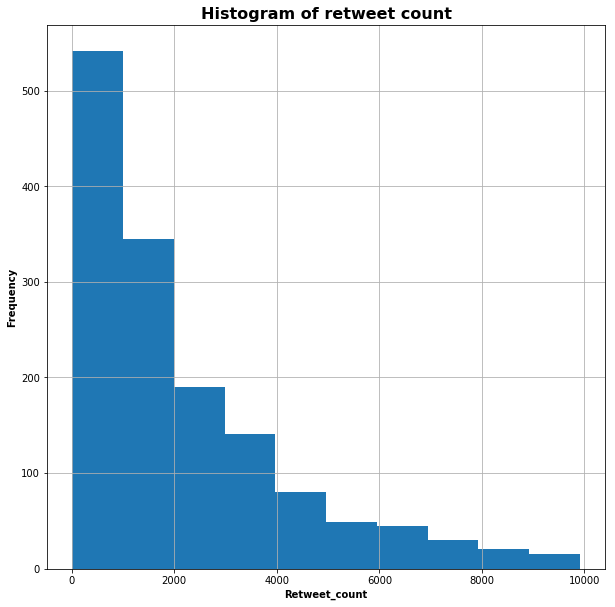

In [72]:
twitter_archive_master[twitter_archive_master.retweet_count<=10000].retweet_count.hist()
plt.title('Histogram of retweet count',fontsize=16,weight='bold')
plt.xlabel('Retweet_count',weight='bold')
plt.ylabel('Frequency',weight='bold')
plt.rcParams['figure.figsize']=(10,10)

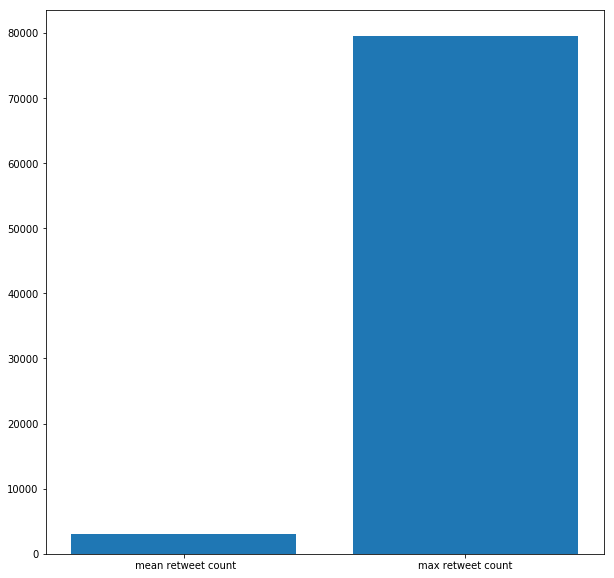

In [91]:
x=twitter_archive_master.retweet_count.mean()
mx=twitter_archive_master.retweet_count.max()

plt.bar([1,2],[x,mx],tick_label=[' mean retweet count','max retweet count'])
plt.rcParams['figure.figsize']=(10,10)

In [92]:
twitter_archive_master.favorite_count.describe()

count      1531.000000
mean       8960.866754
std       12487.087618
min           0.000000
25%        1892.500000
50%        4217.000000
75%       11347.500000
max      132810.000000
Name: favorite_count, dtype: float64

Text(0,0.5,'Frequency')

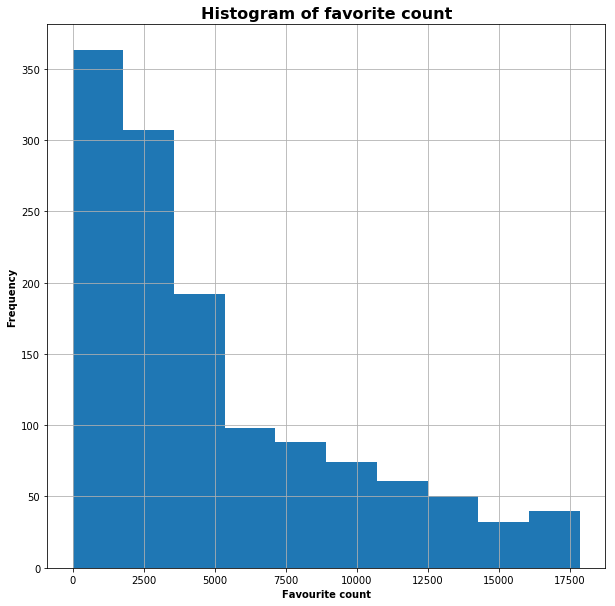

In [96]:
twitter_archive_master[twitter_archive_master.favorite_count<=18000].favorite_count.hist()
plt.title('Histogram of favorite count',fontsize=16,weight='bold')
plt.xlabel('Favourite count',weight='bold')
plt.ylabel('Frequency',weight='bold')

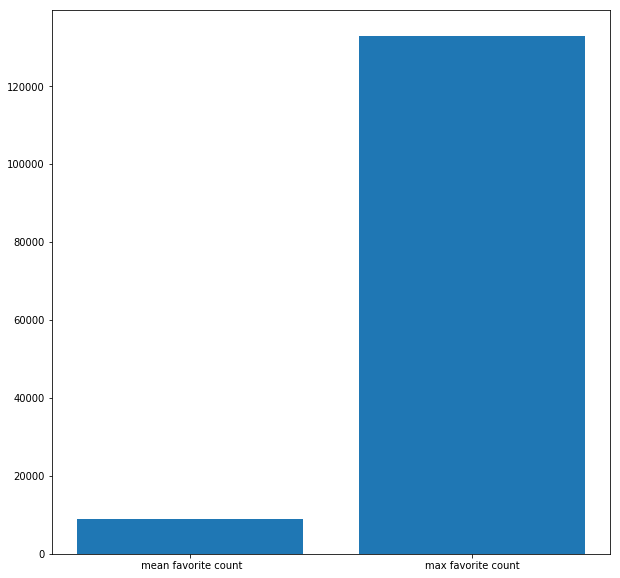

In [102]:
z=twitter_archive_master.favorite_count.max()
mnn=twitter_archive_master.favorite_count.mean()
plt.bar([1,2],[mnn,z],tick_label=[' mean favorite count','max favorite count'])
plt.rcParams['figure.figsize']=(10,10)


In [162]:
df_max_fv=twitter_archive_master.groupby('dog_breed').max()[['favorite_count']]
df_max_fv.head(10).sort_values(by='favorite_count',ascending=False)


,favorite_count
dog_breed,
Border_collie,35179
Blenheim_spaniel,33382
Bernese_mountain_dog,28490
Bedlington_terrier,24678
American_Staffordshire_terrier,23074
Airedale,22036
Australian_terrier,20011
Afghan_hound,17305
Border_terrier,12183


In [163]:
df_max_rt=twitter_archive_master.groupby('dog_breed').max()[['retweet_count']]
df_max_rt.head(10).sort_values(by='retweet_count',ascending=False)

,retweet_count
dog_breed,
Border_collie,7788
Blenheim_spaniel,7097
American_Staffordshire_terrier,6005
Bedlington_terrier,5698
Australian_terrier,5457
Afghan_hound,5312
Bernese_mountain_dog,4903
Airedale,4800
Border_terrier,2357


Text(0.5,1,'Retweet counts over time')

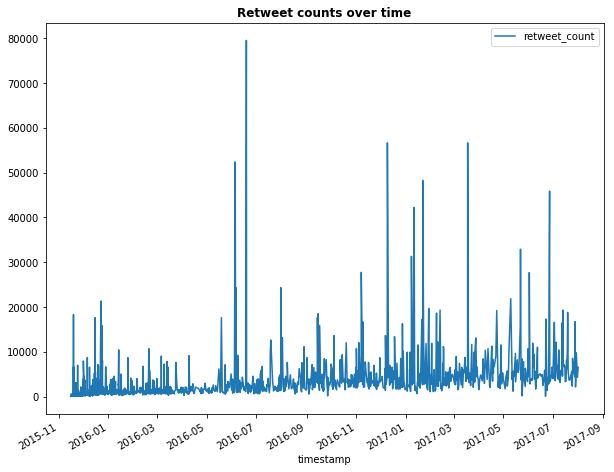

In [89]:

twitter_archive_master.plot(x='timestamp',y='retweet_count',kind='line')
plt.title('Retweet counts over time',weight='bold')
